In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def graph_data():
    dataset = read_csv("data.txt",sep='\n',header=2, low_memory=False, infer_datetime_format=True)
    dataset.columns = ['A']
    
    
    for i in range(0, 1632, 3):
        dataset['A'][i] = pd.to_numeric(dataset['A'][i])
    for i in range(1, 1633, 3):
        dataset['A'][i] = pd.to_numeric(dataset['A'][i])
        
        
    pd.date_range(start ='2019-9-20 3:13:12', freq ='W', end = '2019-9-20 3:22:19')  
    
    
    cpu = np.array(())
    memory = np.array(())
    time = np.array(())
    
    for i in range(0, 1632, 3):                         # max = total rows - 2
        cpu  = np.append(cpu,dataset['A'][i])           
    
    for j in range(1, 1633, 3):                         
        memory  = np.append(memory,dataset['A'][j])
        
    for i in range(2, 1634, 3):
        time  = np.append(time,dataset['A'][i])
    
    data = pd.DataFrame(data = memory, index = time,columns = ['Memory used'])
    data['CPU used'] = cpu
    
    threshold_cpu = 4
    threshold_memory = 5
    new = pd.DataFrame((data['CPU used'] > threshold_cpu) & (data['Memory used'] > threshold_memory))
    
    new.columns = ['A']
    #time_idle = (~new.A).sum() #in seconds
    
    

    index = list(range(1, 545))
    data['index'] = index
    
    data.set_index('index',inplace = True)
    data['Timestamp'] = time
    
    timestamp = np.array(())
    for i in range(1,544,120):
        timestamp = np.append(timestamp,data.iloc[i]['Timestamp'])

    cpu2 = np.array(())
    for i in range(1,544,60):
        cpu2 = np.append(cpu2,data.iloc[i]['CPU used'])
    memory2 = np.array(())
    for i in range(1,544,60):
        memory2 = np.append(memory2,data.iloc[i]['Memory used'])
        
    

    sample = np.array(new['A'])
    cost_idle = np.array(())
    cost_on = np.array(())
    factor = 0.15
    usage = 400/360
    power_cost = 5
    value = np.array(())
    
    for k in range(0,32):
        cost_idle_temp = 0
        cost_on_temp = 0
    
        for i in range(k*17,(k+1)*17):
            value = np.append(value,sample[i])
        for j in range(k*17,(k+1)*17):
            if value[j]==0:
                    cost_idle_temp = cost_idle_temp + factor*usage
            else:
                cost_on_temp = cost_on_temp + usage
            
        cost_idle = np.append(cost_idle,cost_idle_temp)
        cost_on = np.append(cost_on,cost_on_temp)
    total_power = cost_on + cost_idle
    
    timestamp_power = np.array(())
    for i in range(1,544,17):
        timestamp_power = np.append(timestamp_power,data.iloc[i]['Timestamp'])
        
    power = np.sum(total_power)
    power_reduction = np.sum(cost_idle) 
    total_power_cost = power*power_cost
    saved_cost = power_reduction*power_cost
    return total_power,timestamp_power,saved_cost, total_power_cost


In [2]:
total_power,timestamp_power, saved_cost, total_power_cost = graph_data()

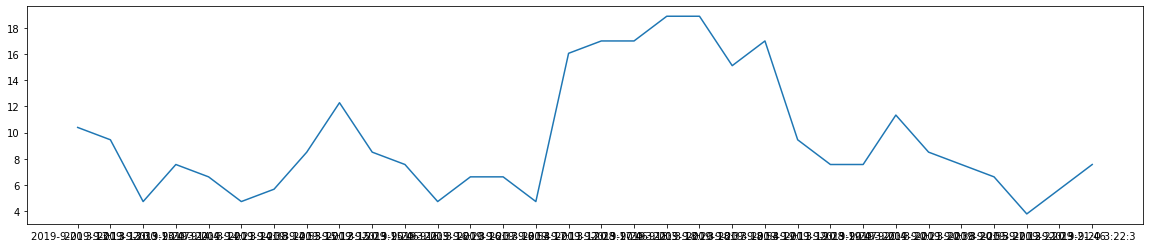

In [3]:
plt.figure(figsize= (20,4))
plt.plot( timestamp_power, total_power)

In [4]:
total_power_cost, saved_cost

(1520.5555555555554, 265.0)

The formulae used for power and cost calculations has been done in variables. A more appropriate formula for calculations can be used to implement on real_life_system.

In our complete project we developed a software, which has control of states of a computer: Shut down, Sleep and ON. Through a PC application, we collect data CPU_usage, Memory_usage etc. and calculate Power.

We assume that there are essentially two states a computer can be in, either idle or awake. For a system when idle, it's CPU_usage and Memory_usage data falls below a certain threshold value, that's how we know that the system is in idle mode.

Now a normal computer even while being completely idle consumes power. So if we shut down or sleep mode the system, the corresponding costs will be saved. Calculations of saved cost have been done in the function above. (The parameters for the calculations can be easily customized depending upon the individual system.)  

So for a system without our software control, 1520.5 would be the cost but if our system was implemented, we would have saved 265.0.
